### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [9]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [10]:
# leer csv
df = pd.read_csv("data/PINA_BROMATOLOGICOS_2.csv")

In [11]:
# estructura del csv
df.head()

,MUESTRA,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,PiSAC50,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,PiSAC50,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,PiSAC50,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,PiSAC50,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,PiSAC50,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


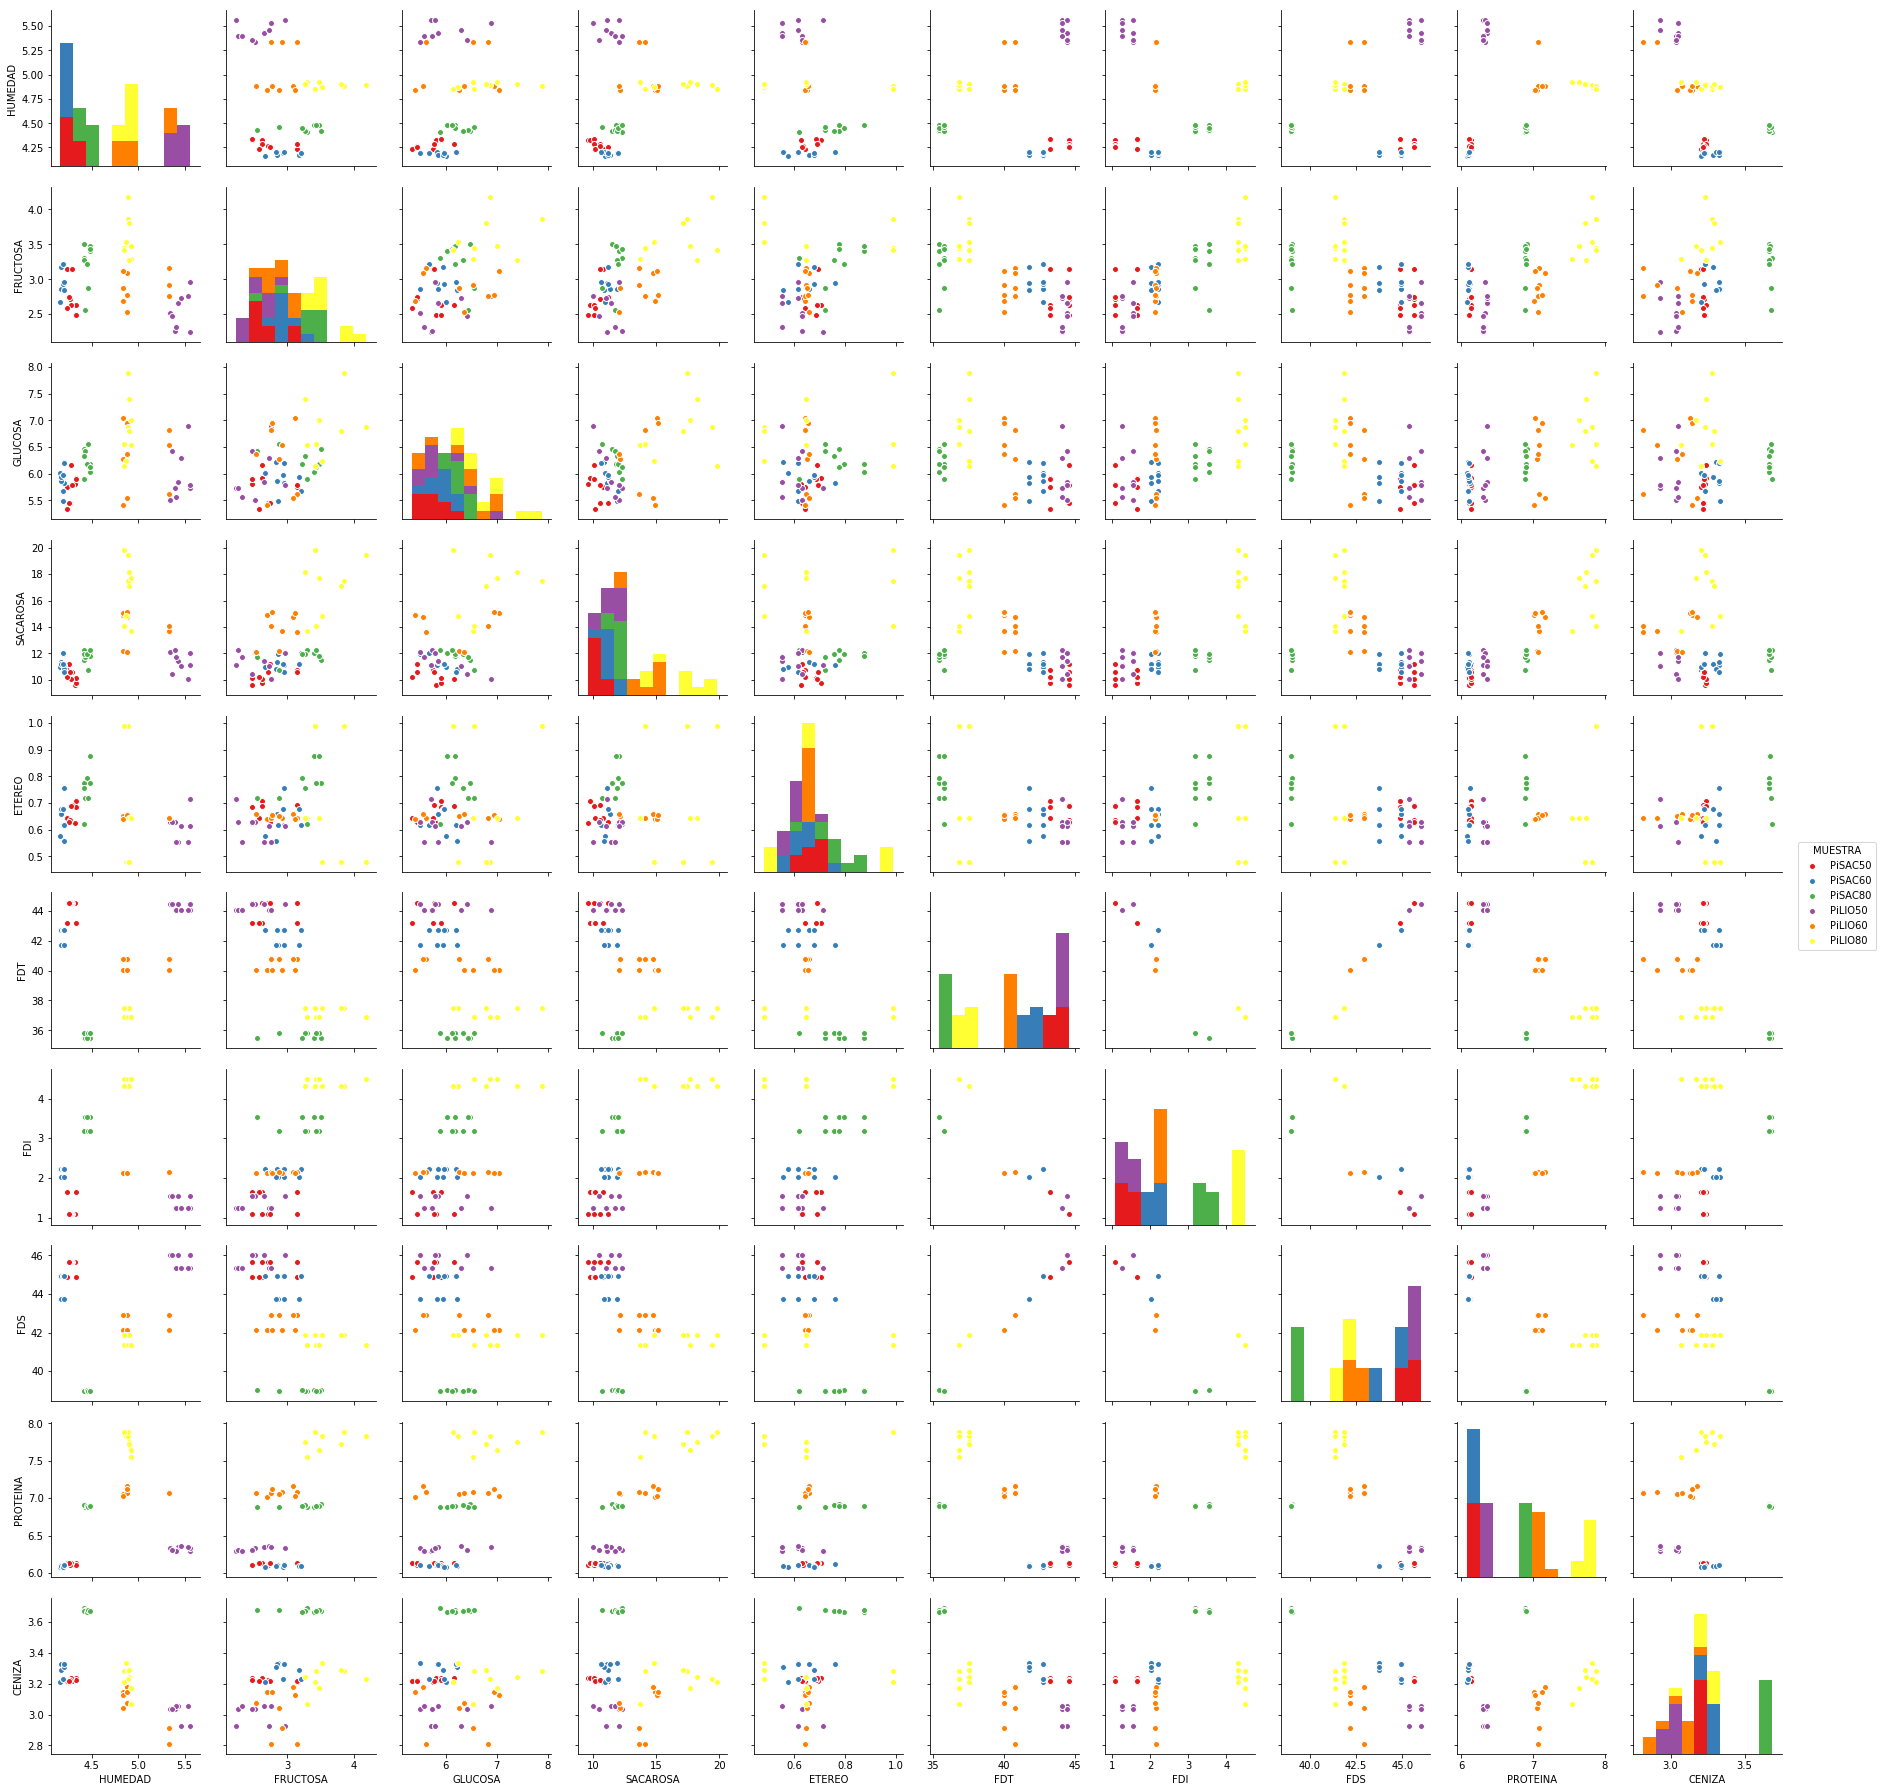

In [12]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [13]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PiLIO50       1.00      1.00      1.00         3
    PiLIO60       1.00      1.00      1.00         2
    PiLIO80       1.00      1.00      1.00         2
    PiSAC50       1.00      1.00      1.00         3
    PiSAC60       1.00      1.00      1.00         5
    PiSAC80       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [17]:
print(confusion_matrix(y_test,predictions))

[[3 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 2]]


In [18]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['HUMEDAD',
 'FRUCTOSA',
 'GLUCOSA',
 'SACAROSA',
 'ETEREO',
 'FDT',
 'FDI',
 'FDS',
 'PROTEINA',
 'CENIZA']

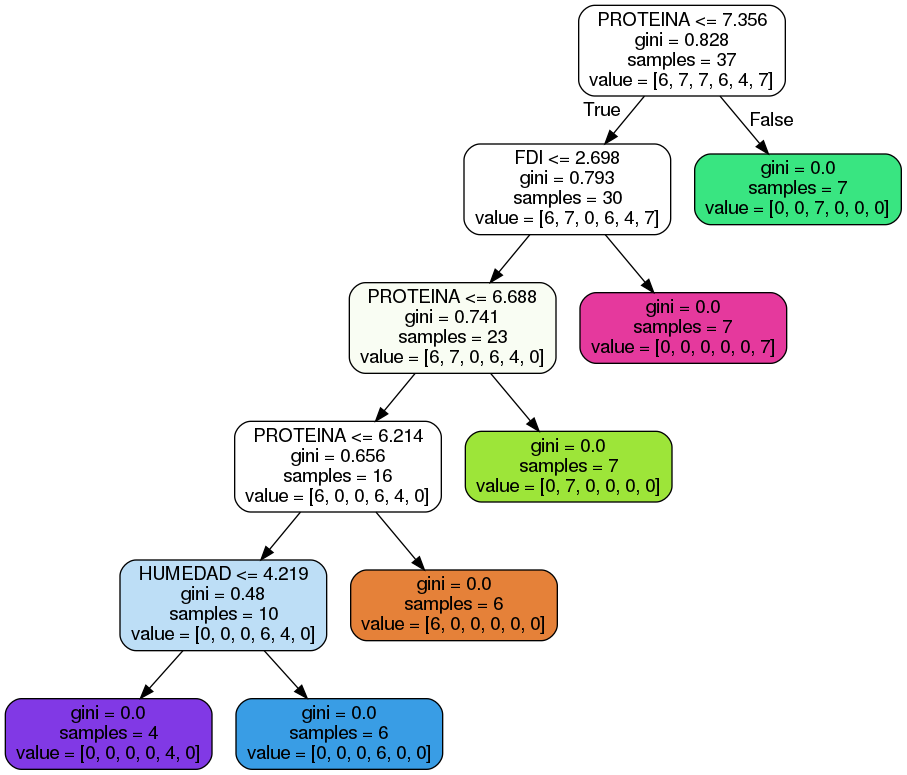

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [20]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[3 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 2]]


In [22]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PiLIO50       1.00      1.00      1.00         3
    PiLIO60       1.00      1.00      1.00         2
    PiLIO80       1.00      1.00      1.00         2
    PiSAC50       1.00      1.00      1.00         3
    PiSAC60       1.00      1.00      1.00         5
    PiSAC80       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        17



In [23]:
# PCA
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop("MUESTRA", axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_data = scaler.transform(X)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x_pca = pca.transform(scaled_data)

In [30]:
scaled_data.shape

(54, 10)

In [31]:
x_pca.shape

(54, 2)

In [32]:
X.head()

,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


In [33]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [34]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

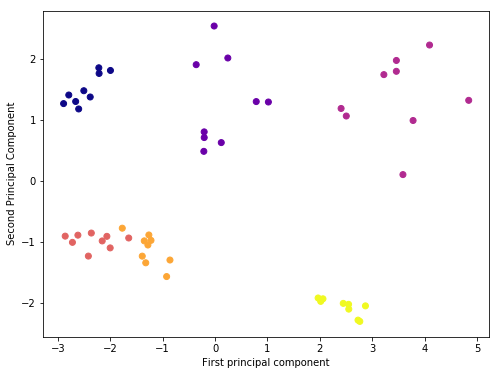

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [36]:
# interpreting the components
pca.components_

array([[-0.01160642,  0.35419941,  0.28104879,  0.30886735,  0.18924273,
        -0.40782293,  0.4101584 , -0.37528785,  0.37783414,  0.21461297],
       [ 0.56862254, -0.00611108,  0.2466873 ,  0.36598298, -0.22917342,
         0.13227253,  0.018952  ,  0.1932118 ,  0.27868301, -0.54448344]])

In [37]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

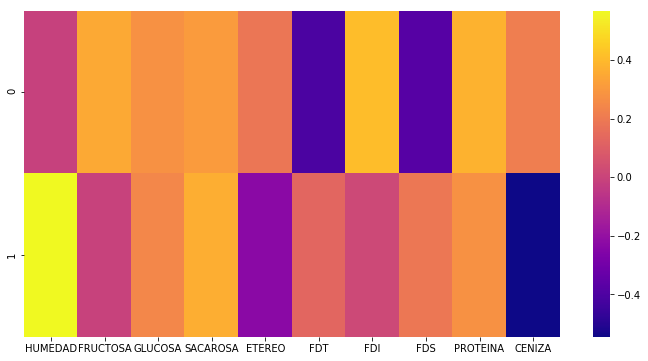

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [40]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [41]:
# using KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 3 0]
 [0 0 0 0 0 2]]


In [46]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         4
          4       0.50      1.00      0.67         1
          5       1.00      0.75      0.86         4
          6       1.00      1.00      1.00         2

avg / total       0.97      0.94      0.95        17



In [47]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

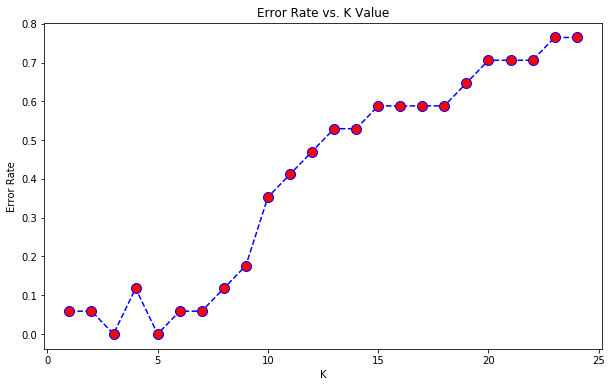

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 3 0]
 [0 0 0 0 0 2]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         4
          4       0.50      1.00      0.67         1
          5       1.00      0.75      0.86         4
          6       1.00      1.00      1.00         2

avg / total       0.97      0.94      0.95        17



In [50]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 0 0 3 0 0]
 [1 1 0 1 0 0]
 [0 0 0 0 0 4]
 [0 0 0 1 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 0 2]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         3
          2       1.00      0.33      0.50         3
          3       0.00      0.00      0.00         4
          4       0.11      1.00      0.20         1
          5       0.00      0.00      0.00         4
          6       0.33      1.00      0.50         2

avg / total       0.22      0.24      0.16        17



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

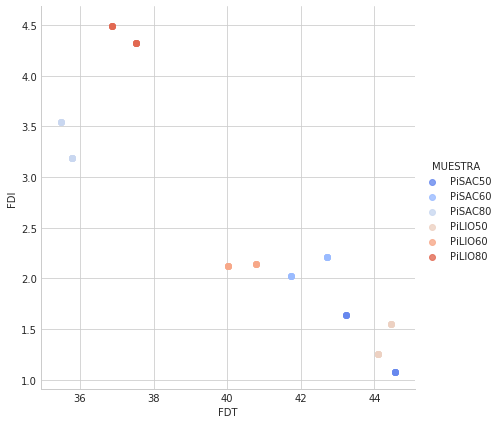

In [52]:
sns.set_style('whitegrid')
sns.lmplot('FDT','FDI',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [53]:
from sklearn.cluster import KMeans

In [54]:
kmeans = KMeans(n_clusters=6)

In [55]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
kmeans.cluster_centers_

array([[ 4.21742678,  2.86934741,  5.85761412, 10.9106815 ,  0.64865112,
        42.57249788,  1.97860082, 44.55109871,  6.10629231,  3.26717665],
       [ 4.88082804,  3.42003747,  6.44534433, 14.21014101,  0.70476309,
        37.09657062,  4.43497048, 41.5315411 ,  7.75306667,  3.2263185 ],
       [ 5.0179657 ,  2.87949154,  6.28602752, 13.94032374,  0.6485377 ,
        40.36456982,  2.13327999, 42.49784981,  7.07772222,  3.02709759],
       [ 4.89249471,  3.667686  ,  7.01395663, 18.29278128,  0.70476309,
        37.31222445,  4.37836148, 41.69058593,  7.7864    ,  3.2363185 ],
       [ 4.44898206,  3.22687741,  6.24543896, 11.8000763 ,  0.76828037,
        35.65001541,  3.34364162, 38.99365703,  6.89424444,  3.67195942],
       [ 5.03182528,  2.61788683,  5.88898272, 10.9987904 ,  0.6262691 ,
        44.36674154,  1.27425468, 45.64099622,  6.25199714,  3.08498402]])

In [57]:
kmeans.labels_

array([0, 5, 0, 5, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 3, 3, 3, 3, 3, 3], dtype=int32)

In [58]:
df.head()

,MUESTRA,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,PiSAC50,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602
1,PiSAC50,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061
2,PiSAC50,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780
3,PiSAC50,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602
4,PiSAC50,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061


In [59]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [60]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA,Cluster
0,PiSAC50,4.238965,3.149972,5.760169,10.764495,0.642319,43.230447,1.640096,44.870542,6.1321,3.207602,4
1,PiSAC50,4.323308,2.481390,5.816839,9.577905,0.625527,44.570721,1.078127,45.648848,6.1028,3.235061,4
2,PiSAC50,4.328086,2.624746,5.912691,9.774983,0.706897,43.230447,1.640096,44.870542,6.1331,3.237780,4
3,PiSAC50,4.289647,3.149972,5.783302,10.578958,0.692319,44.570721,1.078127,45.648848,6.1321,3.217602,4
4,PiSAC50,4.333083,2.481390,5.909170,10.093261,0.685527,43.230447,1.640096,44.870542,6.1028,3.225061,4
5,PiSAC50,4.280862,2.624746,6.166752,10.047898,0.689711,44.570721,1.078127,45.648848,6.1331,3.237780,4
6,PiSAC50,4.238965,2.581556,5.343771,10.165865,0.642319,43.230447,1.640096,44.870542,6.1321,3.217602,4
7,PiSAC50,4.263083,2.717712,5.447516,10.554915,0.635527,44.570721,1.078127,45.648848,6.1028,3.225061,4
8,PiSAC50,4.250862,2.742978,5.450762,11.169254,0.630690,44.570721,1.078127,45.648848,6.1331,3.217780,4
9,PiSAC60,4.206851,2.950521,5.832974,11.121562,0.758332,41.729455,2.023851,43.753306,6.1155,3.328899,5


In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0]
 [0 0 9 0 0 0 0]
 [0 3 0 6 0 0 0]
 [4 0 0 0 0 5 0]
 [9 0 0 0 0 0 0]
 [0 0 0 0 9 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       1.00      1.00      1.00         9
          3       1.00      0.67      0.80         9
          4       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00         9

avg / total       0.33      0.28      0.30        54



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
